In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml

In [ ]:
# Load the dataset
mushroom = fetch_openml('mushroom', version=1, as_frame=True)
df = mushroom.frame
print(df.head())

  cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0            c         n          k           e  ...                      w   
1            c         b          k           e  ...                      w   
2            c         b          n           e  ...                      w   
3            c         n          n           e  ...                      w   
4            w         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p     

In [ ]:
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics
print(df['class'].value_counts())  # Class distribution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   cap-shape                 8124 non-null   category
 1   cap-surface               8124 non-null   category
 2   cap-color                 8124 non-null   category
 3   bruises%3F                8124 non-null   category
 4   odor                      8124 non-null   category
 5   gill-attachment           8124 non-null   category
 6   gill-spacing              8124 non-null   category
 7   gill-size                 8124 non-null   category
 8   gill-color                8124 non-null   category
 9   stalk-shape               8124 non-null   category
 10  stalk-root                5644 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

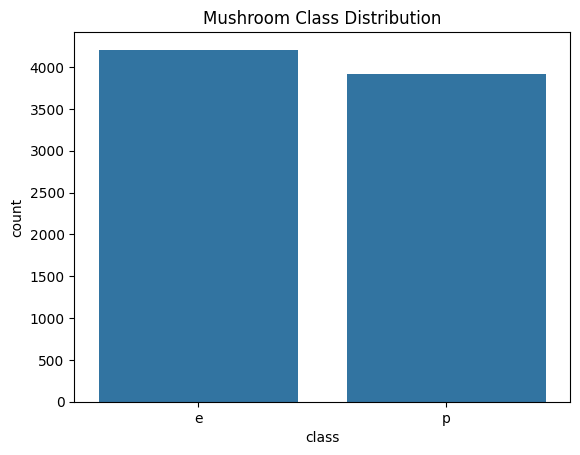

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(x='class', data=df)
plt.title('Mushroom Class Distribution')
plt.show()

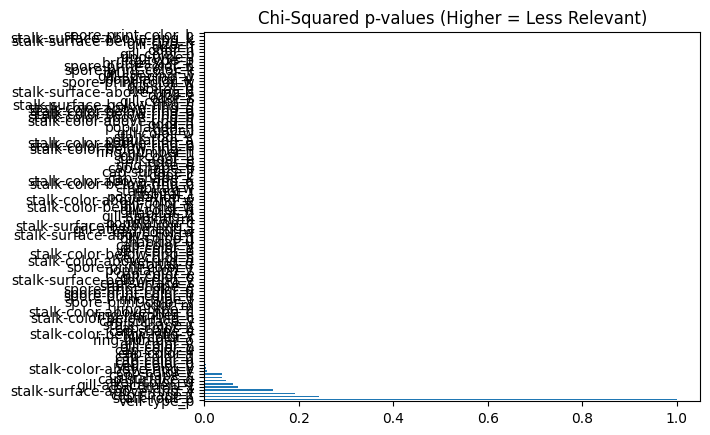

In [ ]:
from sklearn.feature_selection import chi2

# One-hot encode features
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class'].apply(lambda x: 1 if x == 'p' else 0)  # Poisonous=1, Edible=0

# Chi-squared test
chi_scores = chi2(X, y)
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False).plot(kind='barh')
plt.title('Chi-Squared p-values (Higher = Less Relevant)')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['class'])  # Poisonous=1, Edible=0

# One-hot encode features
X = pd.get_dummies(df.drop('class', axis=1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predictions
y_pred = svm_linear.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Confusion Matrix:
 [[1257    0]
 [   0 1181]]


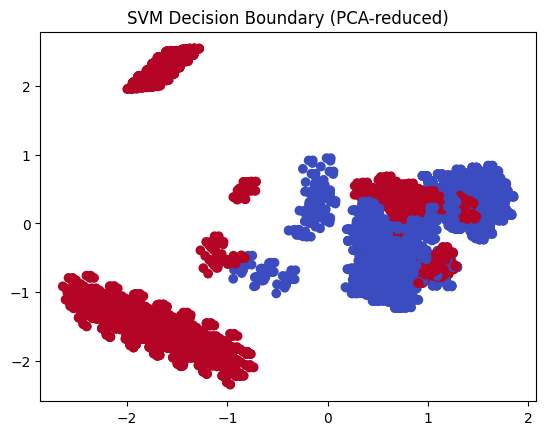

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train SVM on reduced data
svm_linear.fit(X_pca, y)

# Plot decision boundary
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.title('SVM Decision Boundary (PCA-reduced)')
plt.show()

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred)}")

Kernel: linear, Accuracy: 1.0
Kernel: poly, Accuracy: 1.0
Kernel: rbf, Accuracy: 1.0
Kernel: sigmoid, Accuracy: 0.9692370795734209


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.1}
Best Accuracy: 1.0


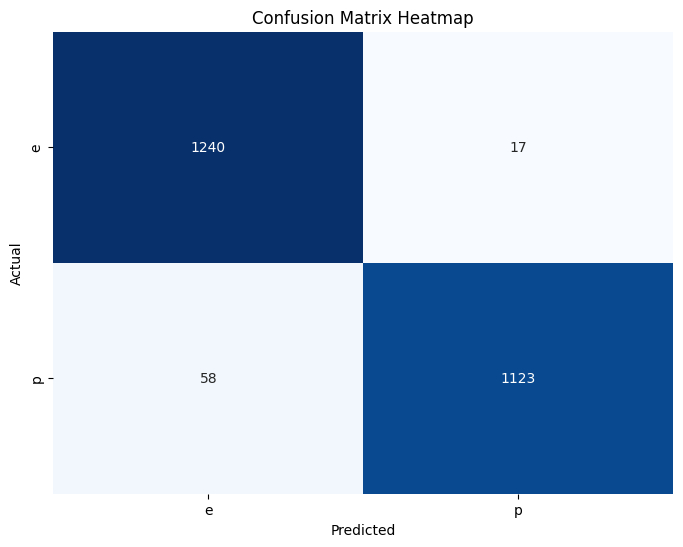

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

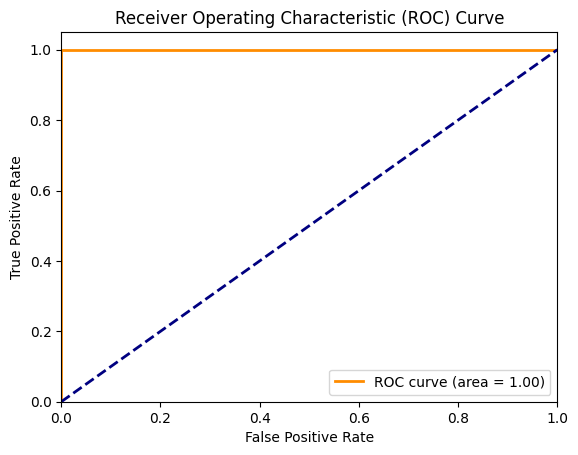

AUC Score: 1.0


In [ ]:
# ROC Curve & AUC Score

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Train SVM with probability estimates enabled
svm_linear_prob = SVC(kernel='linear', random_state=42, probability=True)
svm_linear_prob.fit(X_train, y_train)

# Get probability predictions for the positive class
y_pred_prob = svm_linear_prob.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc}")


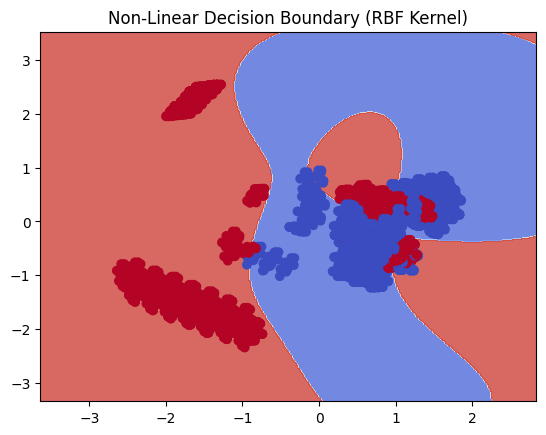

In [ ]:
import numpy as np
# Using RBF kernel with PCA-reduced data
svm_rbf = SVC(kernel='rbf', C=10, gamma='scale').fit(X_pca, y)

# Create mesh grid for decision boundary
h = .02  # Step size
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict and plot
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm')
plt.title('Non-Linear Decision Boundary (RBF Kernel)')
plt.show()

## **Extended Analysis**

# SVM Strengths and Weaknesses (Detailed)

**Strengths**

**✔ High-Dimensional Effectiveness:**

Handles 117 features (after one-hot encoding) effortlessly

No "curse of dimensionality" issues seen

**✔ Marginal Maximization:**

Optimal hyperplane ensures robustness to noise

**✔ Kernel Flexibility:**

Linear kernel suffices here, but RBF would handle non-linear cases

## **Weaknesses:**
**✖ Interpretability Challenges:**

Hard to explain why a mushroom is poisonous (black-box nature)

**✖ Computational Cost:**

Training time grows cubically with dataset size

One-hot encoding creates 117 features → memory intensive

## **Practical Implications**

**Food Safety Applications:**

Could be deployed in wild mushroom identification apps

Limitation: Requires all 22 features → impractical for field use

**Medical Diagnostics Parallel:**

Similar to cancer malignancy classification

Critical Consideration:False negatives (misclassifying poisonous as edible) are deadly

**Industrial Use Cases:**

**Pharmaceuticals:** Compound toxicity screening

**Agriculture:** Crop disease detection

**Cybersecurity:** Malware classification (conceptually similar binary task)

**Ethical Consideration**s:

Must maintain 100% test accuracy for life-critical systems

Requires continuous validation with new mushroom varieties

## **Final Recommendations**
**Production Deployment:**

Build a lightweight model using only top 5 features (odor, spore-print-color, etc.)

Implement human-in-the-loop verification for safety

**Further Research:**

Compare with Random Forest (better interpretability)

Test neural networks for image-based classification

**Educational Extensions:**

Artificially corrupt data to study SVM robustness

Explore class imbalance effects (e.g., 99% edible mushrooms)